In [1]:
import utils.dataset as dataset
import utils.helpers as helpers
import implementations

%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

In [2]:
TRAIN_DATASET = 'data/train.csv'
TEST_DATA = 'data/test.csv'

In [3]:
print("Loading data ..")

# load the train data
Y_train, X_train, indexes = dataset.load_csv_data(TRAIN_DATASET)

# {-1, 1} -> {0l, 1}
Y_train[np.where(Y_train==-1)] = 0.0

print("Load done ..")

Loading data ..
Load done ..


In [4]:
def add_bias_column(X):
    X_temp = np.ones((X.shape[0], X.shape[1]+1))
    X_temp[:,:-1] = X
    X = X_temp
    return X

In [5]:
print("Preprocessing train data ..")

ratio_for_splitting = 0.90

# chosen experimenttally
features_to_delete = [14, 17, 18]

# pre process train data
X_train = dataset.delete_features(X_train, features_to_delete)
X_train = dataset.preprocess_dataset(X_train, 10)

# adding bias to X_train data
X_train = add_bias_column(X_train)

# split_data
Y_train, Y_validation, X_train, X_validation = dataset.split_data(Y_train, X_train, ratio_for_splitting)
helpers.set_validation_dataset(X_validation, Y_validation)

print("Preprocess done ..")

Preprocessing train data ..
Preprocess done ..


In [6]:
print("Preprocessing test data ..")

# load test data for predicting Y_data
Y_test, X_test, indexes = dataset.load_csv_data(TEST_DATA)
Y_test[np.where(Y_test==-1)] = 0.0

# pre process test data
X_test = dataset.delete_features(X_test, features_to_delete)
X_test = dataset.preprocess_dataset(X_test, 10)

X_test = add_bias_column(X_test)

print("Preprocess done ..")

Preprocessing test data ..
Preprocess done ..


In [7]:
### delete

In [8]:
### PLOT PLOT PLOT ### PLOT PLOT PLOT ### PLOT PLOT PLOT ### PLOT PLOT PLOT ### PLOT PLOT PLOT ###

In [9]:
### PLOT PLOT PLOT ### PLOT PLOT PLOT ### PLOT PLOT PLOT ### PLOT PLOT PLOT ### PLOT PLOT PLOT ###

In [10]:
### PLOT PLOT PLOT ### PLOT PLOT PLOT ### PLOT PLOT PLOT ### PLOT PLOT PLOT ### PLOT PLOT PLOT ###

In [35]:
# put function to helpers
def plot_train_test(train_errors, test_errors, test_range, method_name, testparam):
    """
    train_errors, test_errors and lambas should be list (of the same size) the respective train error and test error for a given lambda,
    * lambda[0] = 1
    * train_errors[0] = RMSE of a ridge regression on the train set
    * test_errors[0] = RMSE of the parameter found by ridge regression applied on the test set
    
    degree is just used for the title of the plot.
    """
    plt.semilogx(test_range, train_errors, color='b', marker='*', label="Train error")
    plt.semilogx(test_range, test_errors, color='r', marker='*', label="Test error")
    plt.xlabel(testparam)
    plt.ylabel("R_MSE")
    plt.title(""+method_name+" - "+testparam+" testing")
    leg = plt.legend(loc=1, shadow=True)
    leg.draw_frame(False)
    plt.savefig(method_name+"_"+testparam+"_testing")

In [36]:
# defines initial w of size of features
_features = X_train.shape[1]
w_initial = np.zeros((_features), dtype=int)

In [54]:
def regression_gamma_testing(y, x, ratio, seed, test_range, method_name, params, to_test_param):
    # define parameter
    test_range = test_range
    
    # split data into test and train
    x_tr, x_te, y_tr, y_te = dataset.split_data(x, y, ratio, seed)
    c = 0
    
    # store train and test err
    err_train = []
    err_test = []
    
    training_tr = implementations.Training(method_name, params)
    training_te = implementations.Training(method_name, params)
    
    for ind, new_param in enumerate(test_range):
        training_tr.params[to_test_param] = new_param
        print("GAMMA TRAIN", training_tr.params[to_test_param])
        w_tr, mse_tr = training_tr.fit(x_tr, y_tr)
        
        training_te.params[to_test_param] = new_param  
        print("GAMMA test", training_te.params[to_test_param])
        w_te, mse_te = training_te.fit(x_te, y_te)
                
        err_train.append(mse_tr)
        err_test.append(mse_te)
        c += 1
        print(c, "proportion={p}, gamma={g:.3f}, Training RMSE={tr:.5f}, Testing RMSE={te:.5f}".format(
               p=ratio, g=new_param, tr=err_train[ind], te=err_test[ind]))
    plot_train_test(err_train, err_test, test_range, method_name, to_test_param)

## Linear regression using gradient descent

GAMMA TRAIN 1e-10
Gradient Descent(0/9): gamma=1e-10 mse-loss=0.1714320987654321 
Gradient Descent(1/9): gamma=1e-10 mse-loss=0.1714320987061922 
Gradient Descent(2/9): gamma=1e-10 mse-loss=0.17143209864695227 
Gradient Descent(3/9): gamma=1e-10 mse-loss=0.17143209858771236 
Gradient Descent(4/9): gamma=1e-10 mse-loss=0.1714320985284724 
Gradient Descent(5/9): gamma=1e-10 mse-loss=0.17143209846923255 
Gradient Descent(6/9): gamma=1e-10 mse-loss=0.1714320984099926 
Gradient Descent(7/9): gamma=1e-10 mse-loss=0.1714320983507527 
Gradient Descent(8/9): gamma=1e-10 mse-loss=0.1714320982915128 
Gradient Descent(9/9): gamma=1e-10 mse-loss=0.17143209823227287 
GAMMA test 1e-10
Gradient Descent(0/9): gamma=1e-10 mse-loss=0.17246666666666666 
Gradient Descent(1/9): gamma=1e-10 mse-loss=0.1724666666043282 
Gradient Descent(2/9): gamma=1e-10 mse-loss=0.17246666654198978 
Gradient Descent(3/9): gamma=1e-10 mse-loss=0.17246666647965134 
Gradient Descent(4/9): gamma=1e-10 mse-loss=0.1724666664173129

Gradient Descent(3/9): gamma=7.196856730011513e-08 mse-loss=0.17143197086344952 
Gradient Descent(4/9): gamma=7.196856730011513e-08 mse-loss=0.17143192822965345 
Gradient Descent(5/9): gamma=7.196856730011513e-08 mse-loss=0.17143188559595646 
Gradient Descent(6/9): gamma=7.196856730011513e-08 mse-loss=0.17143184296235853 
Gradient Descent(7/9): gamma=7.196856730011513e-08 mse-loss=0.17143180032885974 
Gradient Descent(8/9): gamma=7.196856730011513e-08 mse-loss=0.1714317576954599 
Gradient Descent(9/9): gamma=7.196856730011513e-08 mse-loss=0.17143171506215915 
GAMMA test 7.196856730011513e-08
Gradient Descent(0/9): gamma=7.196856730011513e-08 mse-loss=0.17246666666666666 
Gradient Descent(1/9): gamma=7.196856730011513e-08 mse-loss=0.17246662180260922 
Gradient Descent(2/9): gamma=7.196856730011513e-08 mse-loss=0.17246657693866027 
Gradient Descent(3/9): gamma=7.196856730011513e-08 mse-loss=0.17246653207481977 
Gradient Descent(4/9): gamma=7.196856730011513e-08 mse-loss=0.172466487211087

Gradient Descent(0/9): gamma=5.179474679231202e-05 mse-loss=0.1714320987654321 
Gradient Descent(1/9): gamma=5.179474679231202e-05 mse-loss=0.1714014284297545 
Gradient Descent(2/9): gamma=5.179474679231202e-05 mse-loss=0.17137080934082846 
Gradient Descent(3/9): gamma=5.179474679231202e-05 mse-loss=0.17134024136638484 
Gradient Descent(4/9): gamma=5.179474679231202e-05 mse-loss=0.17130972437452383 
Gradient Descent(5/9): gamma=5.179474679231202e-05 mse-loss=0.1712792582337139 
Gradient Descent(6/9): gamma=5.179474679231202e-05 mse-loss=0.17124884281279096 
Gradient Descent(7/9): gamma=5.179474679231202e-05 mse-loss=0.1712184779809567 
Gradient Descent(8/9): gamma=5.179474679231202e-05 mse-loss=0.17118816360777847 
Gradient Descent(9/9): gamma=5.179474679231202e-05 mse-loss=0.17115789956318705 
GAMMA test 5.179474679231202e-05
Gradient Descent(0/9): gamma=5.179474679231202e-05 mse-loss=0.17246666666666666 
Gradient Descent(1/9): gamma=5.179474679231202e-05 mse-loss=0.17243439267447974 

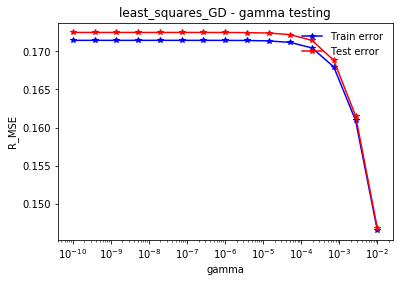

In [61]:
# seed for splitting
seed = 1234
# seed for splitting
split_ratio = ratio_for_splitting
# range of gamma to plot (from, to, iterations)
gamma_range_gd = np.logspace(-10, -2, 15)
# iterations per gamma
iteration_gd = 10
# params for LS-GD
params = {
    'gamma': 0,
    'initial_w': w_initial,
    'max_iters': iteration_gd,
}

regression_gamma_testing(Y_train, X_train, split_ratio, seed, gamma_range_gd, "least_squares_GD", params, "gamma")


## Linear regression using stochastic gradient descent

GAMMA TRAIN 1e-05
SGD(0/9): loss=0.1712730257454648, w0=7.699571641638412e-07, w1=-1.6824210084198731e-06
SGD(1/9): loss=0.17126709854626793, w0=1.5382117481837382e-06, w1=-3.36932107202898e-06
SGD(2/9): loss=0.1712611598342135, w0=2.3131322364118206e-06, w1=-5.047608109178329e-06
SGD(3/9): loss=0.17125519006103576, w0=3.065995189502267e-06, w1=-6.722748269848536e-06
SGD(4/9): loss=0.17124928180334412, w0=3.82638464447383e-06, w1=-8.39877781738873e-06
SGD(5/9): loss=0.17124338222586258, w0=4.589471619387396e-06, w1=-1.0056343115761977e-05
SGD(6/9): loss=0.1712375075176344, w0=5.354779241123661e-06, w1=-1.1720530484460223e-05
SGD(7/9): loss=0.17123158563787214, w0=6.126019307684239e-06, w1=-1.3381134999974147e-05
SGD(8/9): loss=0.17122563818214173, w0=6.892646991151963e-06, w1=-1.5066933736707885e-05
SGD(9/9): loss=0.17121961854554174, w0=7.65803848264806e-06, w1=-1.6765202675227674e-05
GAMMA test 1e-05
SGD(0/9): loss=0.1738385782156174, w0=7.854451516777031e-07, w1=-1.6439355157302098e

SGD(7/9): loss=0.14802138626499722, w0=0.0053418960504865364, w1=-0.011156448657135743
SGD(8/9): loss=0.14633643769033858, w0=0.005929977459622719, w1=-0.012310809690574494
SGD(9/9): loss=0.1447506096380442, w0=0.006476790520979011, w1=-0.01340804934331384
GAMMA test 0.01
SGD(0/9): loss=0.1684365774264989, w0=0.0007854451516777033, w1=-0.0016439355157302088
SGD(1/9): loss=0.16444177963800977, w0=0.0015324807750241596, w1=-0.0031787796092625754
SGD(2/9): loss=0.16127103397274678, w0=0.0022475313276340467, w1=-0.004623474399631337
SGD(3/9): loss=0.15860428885200292, w0=0.0029352863961469343, w1=-0.005992342836092261
SGD(4/9): loss=0.15626414578160042, w0=0.0035992007472237606, w1=-0.007296331500988554
SGD(5/9): loss=0.15414962852058028, w0=0.004241850473280743, w1=-0.008543908747363695
SGD(6/9): loss=0.1522012433982202, w0=0.004865186410030631, w1=-0.009741714833050464
SGD(7/9): loss=0.15038240366697897, w0=0.005470714261870979, w1=-0.010895033465869763
SGD(8/9): loss=0.14866945592034853

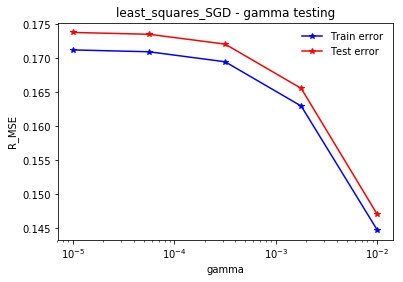

In [51]:
gamma_range_sgd = np.logspace(-5, -2, 5)
# iterations per gamma
iteration_sgd = 10
# params for LS-SGD
params = {
    'initial_w': w_initial,
    'batch_size': 100000,
    'max_iters': iteration_sgd,
    'gamma': 0.00005,
}

regression_gamma_testing(Y_train, X_train, split_ratio, seed, gamma_range_sgd, "least_squares_SGD", params, "gamma")


## Least squares regression using normal equations

## Ridge regression using normal equations

#### Fining hyperparameter lambda

GAMMA TRAIN 0.1
GAMMA test 0.1
1 proportion=0.9, gamma=0.100, Training RMSE=0.07298, Testing RMSE=0.07429
GAMMA TRAIN 0.18329807108324356
GAMMA test 0.18329807108324356
2 proportion=0.9, gamma=0.183, Training RMSE=0.07332, Testing RMSE=0.07460
GAMMA TRAIN 0.33598182862837817
GAMMA test 0.33598182862837817
3 proportion=0.9, gamma=0.336, Training RMSE=0.07361, Testing RMSE=0.07492
GAMMA TRAIN 0.6158482110660264
GAMMA test 0.6158482110660264
4 proportion=0.9, gamma=0.616, Training RMSE=0.07390, Testing RMSE=0.07525
GAMMA TRAIN 1.1288378916846888
GAMMA test 1.1288378916846888
5 proportion=0.9, gamma=1.129, Training RMSE=0.07422, Testing RMSE=0.07561
GAMMA TRAIN 2.0691380811147893
GAMMA test 2.0691380811147893
6 proportion=0.9, gamma=2.069, Training RMSE=0.07458, Testing RMSE=0.07594
GAMMA TRAIN 3.79269019073225
GAMMA test 3.79269019073225
7 proportion=0.9, gamma=3.793, Training RMSE=0.07494, Testing RMSE=0.07624
GAMMA TRAIN 6.951927961775605
GAMMA test 6.951927961775605
8 proportion=0.9, g

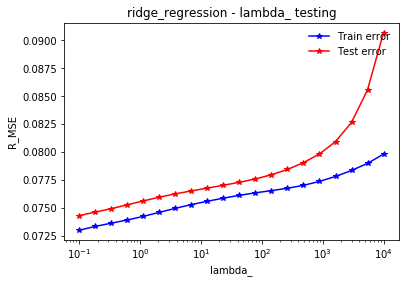

In [42]:
# seed for splitting
seed = 12

# seed for splitting
split_ratio = ratio_for_splitting

# range of lambda to plot (from, to, iterations)
lambdarange = np.logspace(-1, 4, 20)

#ridge_regression_lambda_testing(Y_train, X_train, split_ratio, seed, lambdarange)

params = {
    'lambda_': 0
}
regression_gamma_testing(Y_train, X_train, split_ratio, seed, lambdarange, "ridge_regression", params, "lambda_")


## Logistic regression using gradient descent or SGD

In [67]:
### TODO
### logistic regression(y, tx, initial w, max iters, gamma)


model = implementations.Training('reg_logistic_regression', {
    'lambda_': 0.0005,
    'initial_w': np.zeros(X_train.shape[1]),
    'max_iters': 100 ,
    'gamma': 0.01 ,
})
model.fit(X_train, Y_train)


ValueError: too many values to unpack (expected 2)

## Regularized logistic regression using gradient descent or SGD

In [18]:
### TODO